### 오늘 과제
- 데이터셋 : auto-mpg.csv
- 목적 : 연비 예측
- 학습 방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegession

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
DATA_FILE=r'C:\Users\kdp\Desktop\KDW\EX_Machine_Learning\data\auto_mpg.csv'
DF=pd.read_csv(DATA_FILE)
DF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [5]:
DF['kml']=DF['mpg']*0.425
DF['kml']=round(DF['kml'],1)
DF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kml
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.6
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.6
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.8
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.2
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.5
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.7
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.6
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.9


In [6]:
DF.corr(numeric_only=True)

,mpg,cylinders,displacement,weight,acceleration,model year,origin,kml
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450,0.999956
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543,-0.774871
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409,-0.803425
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024,-0.831149
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873,0.419485
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662,0.579795
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000,0.563548
kml,0.999956,-0.774871,-0.803425,-0.831149,0.419485,0.579795,0.563548,1.000000


In [7]:
weight=DF['weight']
displacement=DF['displacement']
kml=DF['kml']

kml

0       7.6
1       6.4
2       7.6
3       6.8
4       7.2
       ... 
393    11.5
394    18.7
395    13.6
396    11.9
397    13.2
Name: kml, Length: 398, dtype: float64

In [8]:
weightDF=DF['weight']
displacementDF=DF['displacement']
kmlSR=pd.Series(DF['kml'])

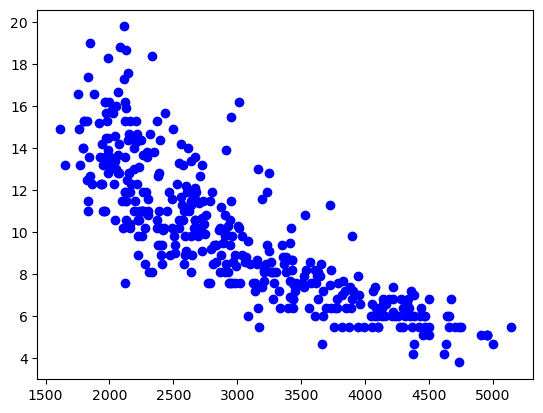

In [9]:
plt.plot(weightDF, kmlSR, 'bo')
plt.show()

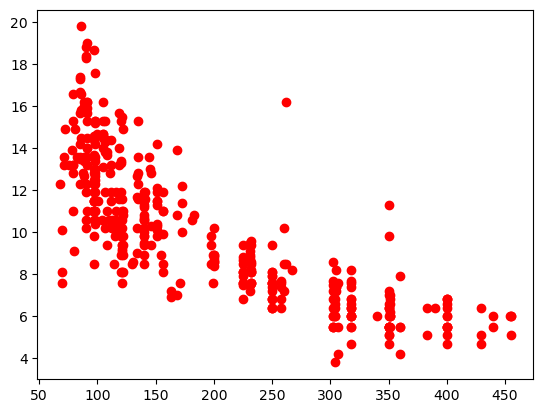

In [10]:
plt.plot(displacementDF, kmlSR, 'ro')
plt.show()

In [11]:
dataDF=pd.DataFrame({'weight':weight, 'displacement':displacement})
dataDF

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0
...,...,...
393,2790,140.0
394,2130,97.0
395,2295,135.0
396,2625,120.0


In [12]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [13]:
# 모듈 인스턴스 생성
model=LinearRegression()

# 학습 진행
model.fit(dataDF, kmlSR)

LinearRegression()

In [18]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_}  절편 : {model.intercept_}')

기울기 : [-0.00246704 -0.00689391]  절편 : 18.655841397688455


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
# 성능지표 => 오차계산과 결정계수 계산
pre_jumsu= model.predict(dataDF)

# 손실/비용계산 함수 ==> 정답과 예측값
mse=mean_squared_error(kmlSR, pre_jumsu)
rmse=mean_squared_error(kmlSR, pre_jumsu, squared=False)
mae=mean_absolute_error(kmlSR, pre_jumsu)

# 얼마나 정답에 가깝게 값을 예측했느냐를 나타내는 지표 ==> 정답과 예측값 제공 : 1에 가까울 수록 좋음
r2= r2_score(kmlSR, pre_jumsu)

In [17]:
r2

0.6968945413241234